# Importing all the libraries which are required in doing project and dumping data in my sql database from python program to query our data

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import os

# CSV files and their corresponding table names
csv_files = [
    ("delivery_info.csv", "delivery_info"),
    ("delivery_person_info.csv", "delivery_person_info"),
    ("restaurant_info.csv", "restaurant_info")
]

# Connecting to the MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Tahera@1313",
    database="zomato"
)

cursor = conn.cursor()

# Folder containing the CSV files
folder_path = r"C:\Users\Maaz\Desktop\zomato dataset"


def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_bool_dtype(dtype):
        return "BOOLEAN"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Debugging: print the file path
    print(f"Looking for file at: {file_path}")
    
    if not os.path.exists(file_path):
        print(f"Error: {file_path} not found.")
        continue
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Debugging: checking for NaN values
    print(f"Processing {csv_file}")
    print("NaN values before replacement:\n{}\n".format(df.isnull().sum()))

    # Clean column names
    df.columns = [col.replace(" ", "_").replace("-", "_").replace(".", "_").replace("()","_") for col in df.columns]

    # Generate the CREATE TABLE statement with their data types
    columns = ", ".join(['`{}` {}'.format(col, get_sql_type(df[col].dtype)) for col in df.columns])
    create_table_query = 'CREATE TABLE IF NOT EXISTS `{}` ({})'.format(table_name, columns)
    cursor.execute(create_table_query)

    # Insert DataFrame rows into MySQL table
    for _, row in df.iterrows():
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Looking for file at: C:\Users\Maaz\Desktop\zomato dataset\delivery_info.csv
Processing delivery_info.csv
NaN values before replacement:
ID                      0
Order_Date              0
Time_Orderd             0
Time_Order_picked       0
Weather_conditions      0
Road_traffic_density    0
Type_of_order           0
multiple_deliveries     0
Festival                0
City                    0
Time_taken_min          0
dtype: int64

Looking for file at: C:\Users\Maaz\Desktop\zomato dataset\delivery_person_info.csv
Processing delivery_person_info.csv
NaN values before replacement:
ID                         0
Delivery_person_ID         0
Delivery_person_Age        0
Delivery_person_Ratings    0
Vehicle_condition          0
Type_of_vehicle            0
dtype: int64

Looking for file at: C:\Users\Maaz\Desktop\zomato dataset\restaurant_info.csv
Processing restaurant_info.csv
NaN values before replacement:
ID                             0
Restaurant_latitude            0
Restaurant_longitude

In [350]:
db=mysql.connector.connect(host="localhost",user="root",password="Tahera@1313",database="zomato")
cur=db.cursor()

# What is the average delivery time for the deliveries? How are our delivery times distributed?

In [351]:
query='''select round(avg(Time_taken_min),2) as avg_delivery_time from delivery_info '''
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data)
print("average delivery time taken",df[0][0])



average delivery time taken 26.62


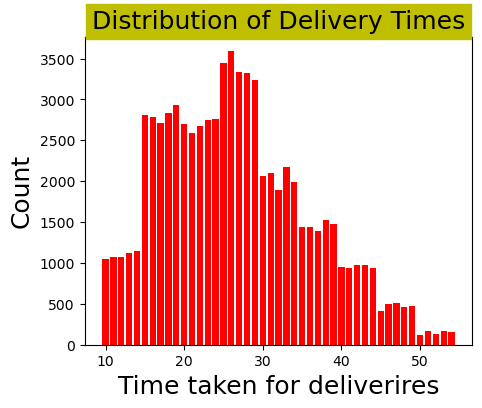

In [437]:
query=''' select Time_taken_min,count(Time_taken_min) as total_count from delivery_info group  
            by Time_taken_min order by Time_taken_min asc '''
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=["Time_taken_in_minutes","Total_count"])
plt.figure(figsize=(5,4))
plt.bar(df["Time_taken_in_minutes"],df["Total_count"],color="red")
plt.xlabel("Time taken for deliverires",color="k",fontsize=18)
plt.ylabel("Count",color="k",fontsize=18)
plt.title("Distribution of Delivery Times",fontsize=18,backgroundcolor="y")
plt.show()

Average delivery time is 26.62 minutes. Delivery times range from 10 minutes to almost an hour,
while maximum delivery times are at the range of 20 to 30 minutes.

# Are there any distinctive relationships between delivery time and overall ratings of the delivery person?

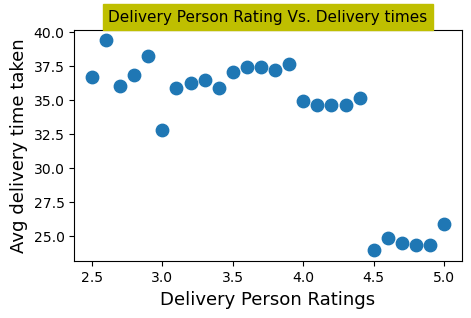

In [353]:
query=''' select p.Delivery_person_Ratings,round(avg(d.Time_taken_min),2) as avg_delivery_time_taken
          from delivery_info d join delivery_person_info p on d.ID=p.ID 
          group by p.Delivery_person_Ratings order by avg_delivery_time_taken'''
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Delivery_person_Ratings","avg_delivery_time_taken"])
plt.figure(figsize=(5,3))
plt.scatter(df["Delivery_person_Ratings"],df["avg_delivery_time_taken"],s=80)
plt.xlabel("Delivery Person Ratings",color="k",fontsize=13)
plt.ylabel("Avg delivery time taken",color="k",fontsize=13)
plt.title("Delivery Person Rating Vs. Delivery times",fontsize=11,backgroundcolor="y")
plt.show()

Observation : It seems that the delivery person with rating of more then 4.5 is delivering the orders faster and
                             delivery person with rating of less then 3 is taking more time to deliver the orders.

# How is the age of delivery persons distributed? Are there any specific age groups that are higher in numbers? How is age impacting the delivery time?

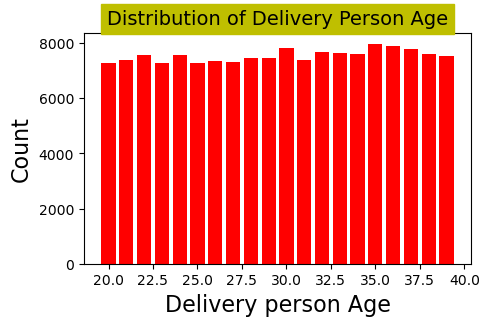

In [354]:
query=''' select p.Delivery_person_Age,count(p.Delivery_person_Age) as num_of_people,
          avg(d.Time_taken_min) as avg_time_taken from delivery_info d join delivery_person_info p 
          on d.ID=p.ID group by p.Delivery_person_Age order by p.Delivery_person_Age'''

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Delivery_person_Age","num_of_people","avg_time_taken"])
plt.figure(figsize=(5,3))
plt.bar(df["Delivery_person_Age"],df["num_of_people"],color="red")
plt.xlabel("Delivery person Age",color="k",fontsize=16)
plt.ylabel("Count",color="k",fontsize=16)
plt.title("Distribution of Delivery Person Age",fontsize=14,color="k",backgroundcolor="y")
plt.show()

 Observation - The age of delivery partners ranges from 20 to 40 years and There are no significant disparities 
                in the age distribution  as it is relatively balanced age distribution among delivery persons 
                but there is a slight tendency for delivery persons to be around 30 to 35 years old.

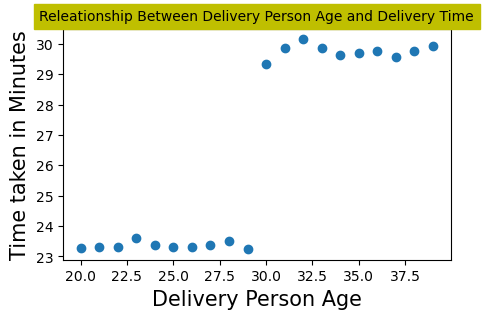

In [355]:
plt.figure(figsize=(5,3))
plt.scatter(df["Delivery_person_Age"],df["avg_time_taken"])
plt.xlabel("Delivery Person Age",color="k",fontsize=15)
plt.ylabel("Time taken in Minutes",color="k",fontsize=15)
plt.title("Releationship Between Delivery Person Age and Delivery Time",fontsize=10,backgroundcolor="y")
plt.show()

Observation - As we can see, delivery persons in the age range of 20 to 27 tend to take less time to deliver packages 
              compared to those in the age range of 32 to 39. This suggests that age may be impacting delivery time.
            Therefore, it appears that age and delivery time are directly proportional.
   

# What is the numerical breakdown of order types?

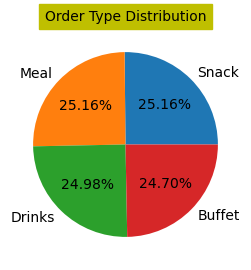

In [356]:
query='''select Type_of_order,count(type_of_order) as total_counts from delivery_info group by type_of_order'''

cur.execute(query)
data=cur.fetchall()
plt.figure(figsize=(5,3))
df=pd.DataFrame(data,columns=["Type_of_order","Total_counts"])
plt.pie(df["Total_counts"],labels=df["Type_of_order"],autopct="%.2f%%")
plt.title("Order Type Distribution",fontsize=10,backgroundcolor="y")
plt.show()

# What kinds of vehicles are being used and how are they delivering in terms of time?

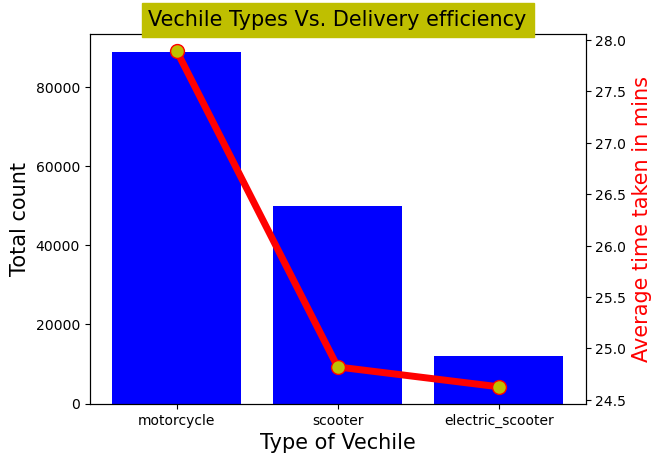

In [357]:
query='''select p.Type_of_vehicle,count(p.Type_of_vehicle) as Total_count,avg(d.Time_taken_min) as avg_time_taken
          from delivery_info d join delivery_person_info p on d.ID=p.ID group by p.Type_of_vehicle'''

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Type_of_vechile","Total_count","avg_time_taken"])

fig,ax1=plt.subplots()
ax1.bar(df["Type_of_vechile"],df["Total_count"],color="blue")
ax1.set_xlabel("Type of Vechile",fontsize=15)
ax1.set_ylabel("Total count",fontsize=15)

ax2=ax1.twinx()
ax2.plot(df["Type_of_vechile"],df["avg_time_taken"],"o-r",lw=5,mfc="y",ms=10)
ax2.set_ylabel("Average time taken in mins",color="red",fontsize=15)

plt.title("Vechile Types Vs. Delivery efficiency",backgroundcolor="y",fontsize=15)
plt.show()

Observation -Motorcycles are the most commonly used vehicles for deliveries, with a total count of 22,225.
            Electric scooters are the most time-efficient for deliveries, while motorcycles, despite their higher usage,
            are slower. This  suggest that electric scooters will be preferable for doing quicker deliveries.

# Does weather conditions affect the time taken for deliveries ?

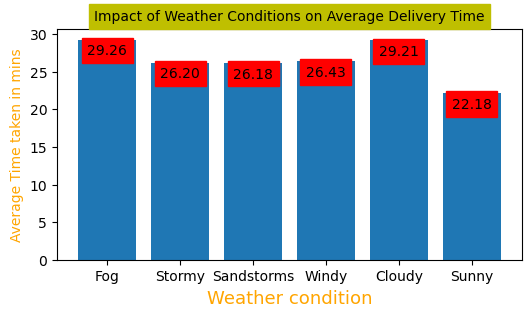

In [358]:
query=''' select Weather_conditions,round(avg(Time_taken_min),2) as avg_time_taken
        from delivery_info group by Weather_conditions'''

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Weather_conditions","avg_time_taken"])
plt.figure(figsize=(6,3))
plt.bar(df["Weather_conditions"],df["avg_time_taken"])
plt.xlabel("Weather condition",fontsize=13,color="orange")
plt.ylabel("Average Time taken in mins",fontsize=10,color="orange")
plt.title("Impact of Weather Conditions on Average Delivery Time",fontsize=10,backgroundcolor="y")
for i in range(6):
    plt.annotate(df["avg_time_taken"][i],(df["Weather_conditions"][i],df["avg_time_taken"][i]-2),ha="center",backgroundcolor="r")
plt.show()

Observation - From this graph we can obersve that Sunny weather results in the shortest average delivery time (22.18 minutes).
             Fog and Cloudy conditions result in the longest average delivery times (29.26 and 29.21 minutes, respectively.
The graph visually emphasizes that adverse weather conditions generally lead to longer delivery times, 
            with Sunny weather being the most optimal for efficiency.





                                                                                    
                                                                                     


# How does the number of orders placed vary by city?

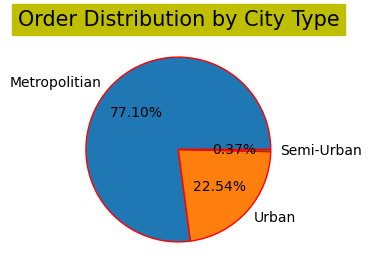

In [359]:
query='''select City,count(ID) as Total_orders_placed from delivery_info group by City'''

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["City","Total_orders_placed"])
plt.figure(figsize=(5,3))
plt.pie(df["Total_orders_placed"],labels=df["City"],autopct="%.2f%%",wedgeprops={"edgecolor":"red"})
plt.title("Order Distribution by City Type",fontsize=15,backgroundcolor="y")
plt.show()

Observation - This pie chart simpally shows that Metropolitan areas dominate with 77.10% of orders while Semi-Urban areas
              have the least at 0.37% so this indicates that demand is highest in Metropolitan regions.

# How does traffic intensity impact average delivery time 

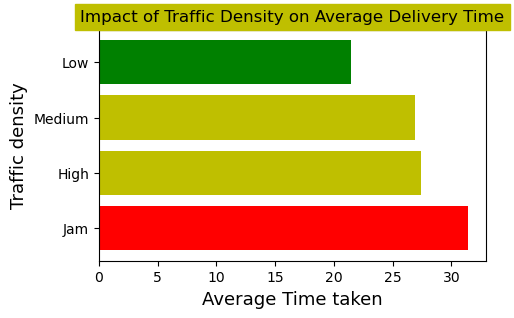

In [361]:
query=''' select Road_traffic_density,round(avg(Time_taken_min),2)  as avg_time_taken 
            from delivery_info group by Road_traffic_density'''

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Road_traffic_density","avg_time_taken"])
plt.figure(figsize=(5,3))
colors=["red","y","y","g"]
plt.barh(df["Road_traffic_density"],df["avg_time_taken"],color=colors)
plt.xlabel("Average Time taken",fontsize=13)
plt.ylabel("Traffic density",fontsize=13)
plt.title("Impact of Traffic Density on Average Delivery Time",fontsize=12,backgroundcolor="y")
plt.show()

Observation - As traffic density increases, the average delivery time also increases significantly.Deliveries in "Jam"
conditions take the longest, while "Low" traffic density takes the shortest delivery time.
This suggests a strong correlation between higher traffic density and longer delivery times.


# Do weather condition affect the number of orders placed by customers ?

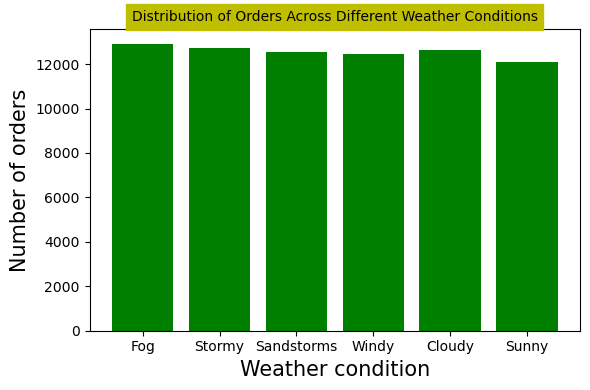

In [390]:
query=''' select Weather_conditions,count(ID) as Total_orders from delivery_info group by Weather_conditions '''

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Weather_conditions","Total_orders"])
plt.figure(figsize=(6,4))
plt.bar(df["Weather_conditions"],df["Total_orders"],color="g")
plt.xlabel("Weather condition",fontsize=15)
plt.ylabel("Number of orders",fontsize=15)
plt.title("Distribution of Orders Across Different Weather Conditions",fontsize=10,backgroundcolor="y")
plt.tight_layout()
plt.show()

Observation - The number of orders seems to be relatively consistent across different weather conditions. 
    The differences in the total number of orders between different weather conditions are minimal so There doesn't seem to be 
    a significant impact of weather conditions on the number of orders, as all weather conditions show almost a similar number of orders.

In [395]:
# Install geopy 
pip install geopy


  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 660.6 kB/s eta 0:00:01
   ----------------------------- ---------- 92.2/125.4 kB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 92.2/125.4 kB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 92.2/125.4 kB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 92.2/125.4 kB

In [397]:
query=''' select Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude 
           from restaurant_info'''

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"])


from geopy.distance import geodesic

# Function to calculate distance using geopy
def calculate_distance(row):
    restaurant_coords = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_coords = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return geodesic(restaurant_coords, delivery_coords).kilometers

# Apply the function to each row
df['Distance_km'] = df.apply(calculate_distance, axis=1)
print(df)

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                  30.3280               78.0461                     30.3980   
1                  10.0031               76.3076                     10.0431   
2                  18.5625               73.9166                     18.6525   
3                  30.8996               75.8093                     30.9196   
4                  26.4635               80.3729                     26.5935   
...                    ...                   ...                         ...   
75367              23.3713               85.3279                     23.4813   
75368              26.9023               75.7943                     26.9123   
75369              13.0224               80.2424                     13.0524   
75370              11.0018               76.9862                     11.0418   
75371              23.3511               85.3257                     23.4311   

       Delivery_location_longitude  Dis

# Is there a correlation between the frequency of orders and the distance from the restaurant?


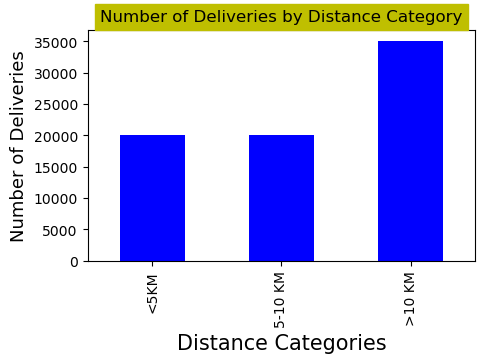

In [407]:
df["distance_category"]=pd.cut(df["Distance_km"],bins=[0,5,10,float("inf")],labels=["<5KM","5-10 KM",">10 KM"])

# Count the number of deliveries in each category
distance_counts=df["distance_category"].value_counts().sort_index()

plt.figure(figsize=(5,3))
distance_counts.plot(kind="bar",color="blue")
plt.xlabel("Distance Categories",fontsize=15)
plt.ylabel("Number of Deliveries",fontsize=13)
plt.title("Number of Deliveries by Distance Category",backgroundcolor="y")
plt.show()



Observation -This Graph suggests that the delivery service frequently handles longer distances > 10 km  having the 
highest number of deliveries which might require efficient route planning and logistics management to maintain timely deliveries.

# To check Correlation Between Distance and Delivery Time


The correlation between distance and delivery time -0.0021899232722630544


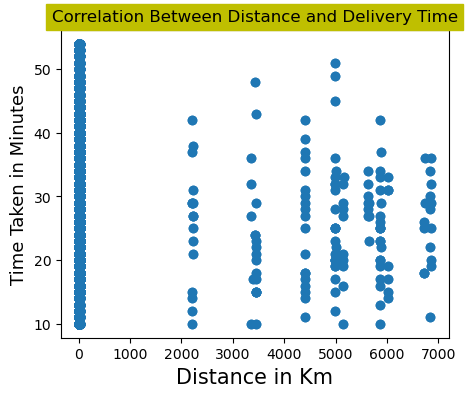

In [435]:
query=''' select Time_taken_min from delivery_info'''

cur.execute(query)
data=cur.fetchall()
df1=pd.DataFrame(data,columns=["Time_taken_min"])
plt.figure(figsize=(5,4))
plt.scatter(df["Distance_km"],df1["Time_taken_min"])
plt.xlabel("Distance in Km",fontsize=15)
plt.ylabel("Time Taken in Minutes",fontsize=13)
plt.title("Correlation Between Distance and Delivery Time",backgroundcolor="y")
correlation=df["Distance_km"].corr(df1["Time_taken_min"])
print("The correlation between distance and delivery time",correlation)
plt.show()

Observation - The correlation coefficient is very close to 0, indicating almost no linear relationship between the distance of
deliveries and the time taken.Distance alone doesn't seem to be a significant predictor of delivery time in this data, 
implying that other factors need to be considered to understand what affects delivery time the most.

